### Load data

In [173]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-06-09,124.080002,125.800003,123.190002,123.430000,123.430000,51330000,AMAZON
2023-06-12,124.019997,126.779999,123.529999,126.570000,126.570000,51338000,AMAZON
2023-06-13,128.119995,128.410004,125.180000,126.660004,126.660004,50564800,AMAZON
2023-06-14,126.699997,126.949997,124.120003,126.419998,126.419998,52422500,AMAZON
2023-06-15,125.209999,127.690002,124.320000,127.110001,127.110001,60458500,AMAZON
2023-06-16,127.709999,127.900002,125.300003,125.489998,125.489998,84188100,AMAZON
2023-06-20,124.970001,127.250000,124.500000,125.779999,125.779999,56930100,AMAZON
2023-06-21,125.639999,126.730003,123.849998,124.830002,124.830002,52137700,AMAZON
2023-06-22,125.309998,130.330002,125.139999,130.149994,130.149994,90354600,AMAZON


# Information about data

### AAPL

In [174]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-06-27 to 2023-06-23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


### Goog

In [175]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-06-27 to 2023-06-23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


### MSFT

In [176]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-06-27 to 2023-06-23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


### AMZN

In [177]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-06-27 to 2023-06-23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


### Predicting


In [178]:
# Get the stock quote
df_AAPL = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
df_GOOG= pdr.get_data_yahoo('GOOG', start='2012-01-01', end=datetime.now())
df_MSFT= pdr.get_data_yahoo('MSFT', start='2012-01-01', end=datetime.now())
df_AMZN= pdr.get_data_yahoo('AMZN', start='2012-01-01', end=datetime.now())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Analyze Close price AAPL

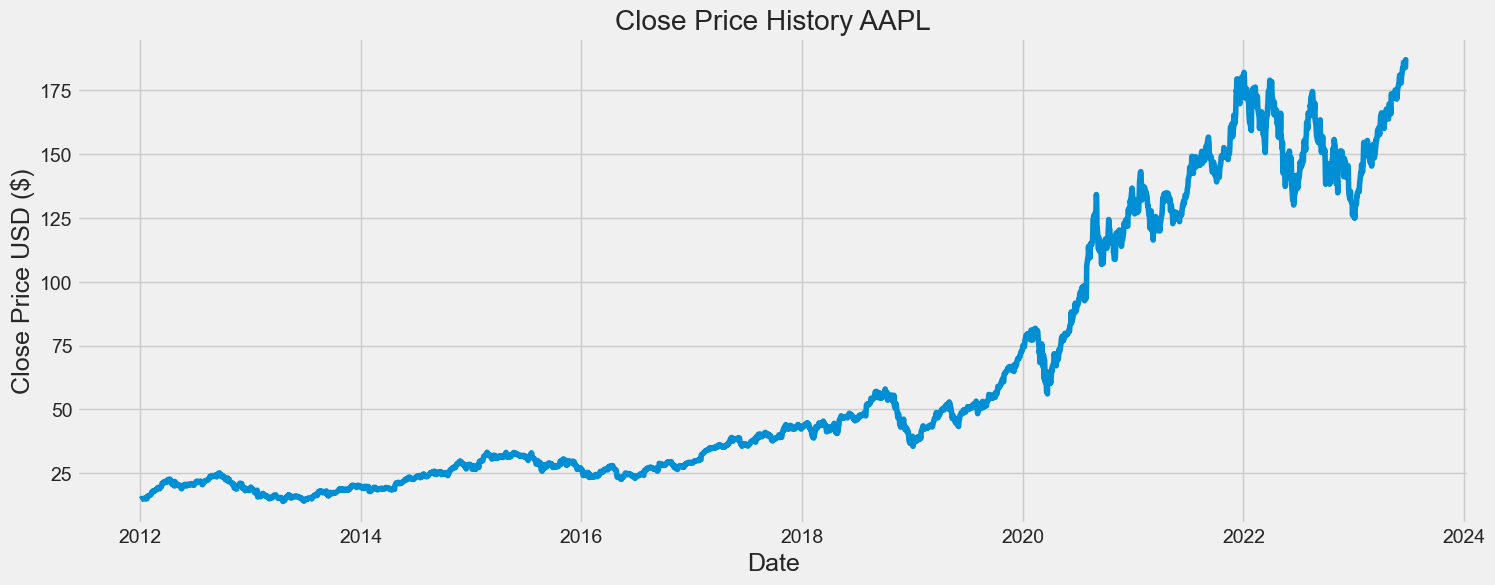

In [179]:
plt.figure(figsize=(16,6))
plt.title('Close Price History AAPL')
plt.plot(df_AAPL['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

### Analyze Close Price GOOG

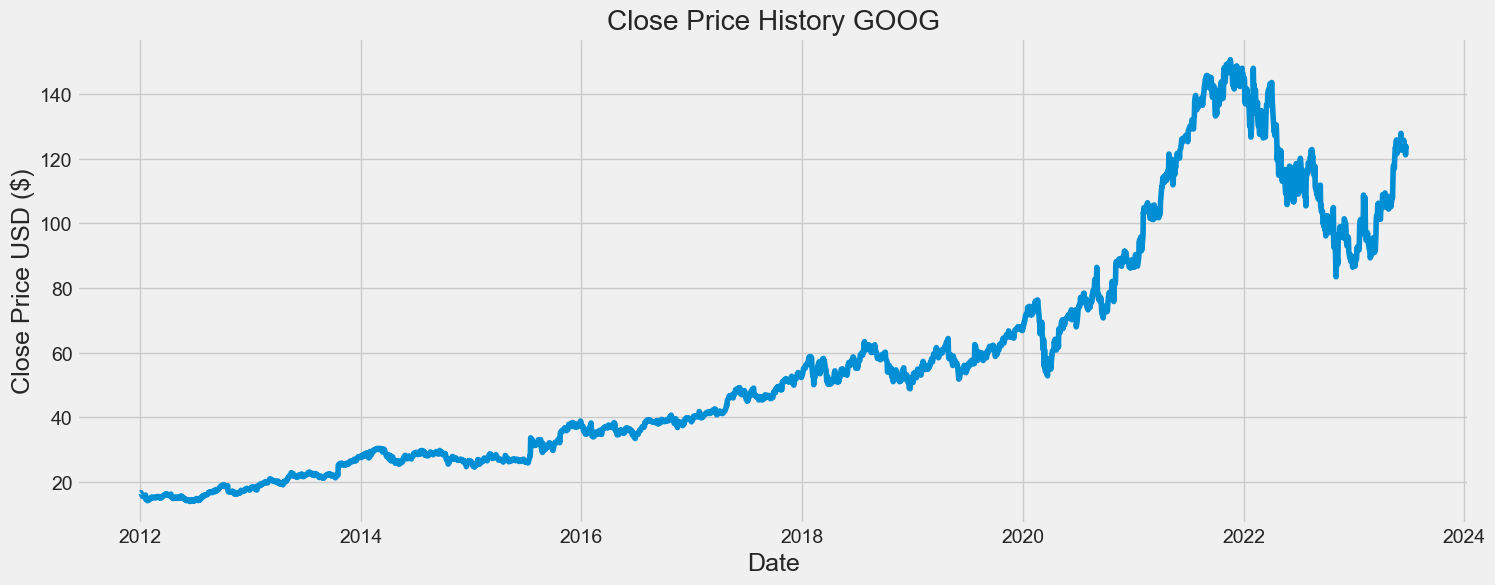

In [180]:
plt.figure(figsize=(16,6))
plt.title('Close Price History GOOG')
plt.plot(df_GOOG['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

### Analyze Close Price MSFT

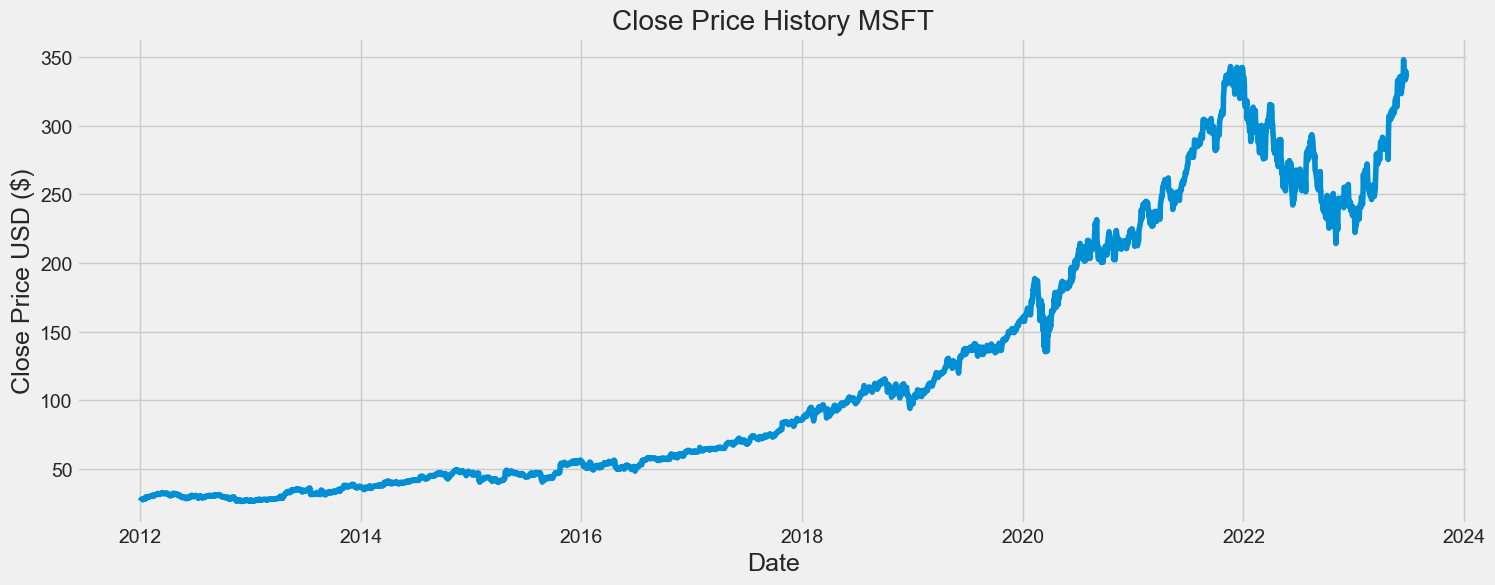

In [181]:
plt.figure(figsize=(16,6))
plt.title('Close Price History MSFT')
plt.plot(df_MSFT['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

### Analyze Close Price AMZN

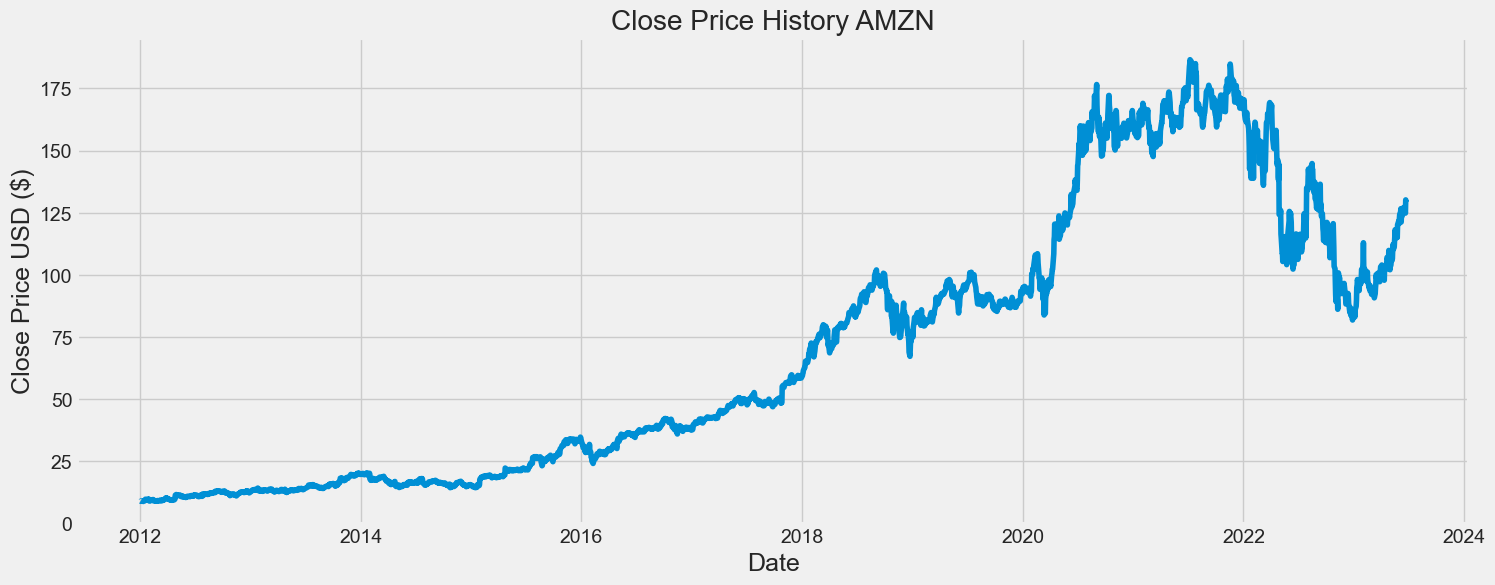

In [182]:
plt.figure(figsize=(16,6))
plt.title('Close Price History AMZN')
plt.plot(df_AMZN['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

# Model AAPL

In [183]:
# Create a new dataframe with only the 'Close column 
data = df_AAPL.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

print(training_data_len)

# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

2743
[[0.00427203]
 [0.00472812]
 [0.0056754 ]
 ...
 [0.98243312]
 [1.        ]
 [0.99815081]]
[array([0.00427203, 0.00472812, 0.0056754 , 0.00657728, 0.006439  ,
       0.00675063, 0.00660823, 0.00636883, 0.00604275, 0.00705195,
       0.00796208, 0.0076814 , 0.00614388, 0.00761123, 0.00616658,
       0.01158401, 0.01116507, 0.01171197, 0.01289452, 0.01361065,
       0.0135508 , 0.01332998, 0.01427106, 0.01515642, 0.01615942,
       0.01777949, 0.02118267, 0.02123426, 0.02312882, 0.02454457,
       0.02211138, 0.02304833, 0.02302976, 0.02565696, 0.02528341,
       0.02597477, 0.02721717, 0.02790854, 0.02990009, 0.03135092,
       0.03176987, 0.03191641, 0.02943575, 0.02883724, 0.02892599,
       0.03125807, 0.03191435, 0.03332391, 0.0366466 , 0.04107961,
       0.04024996, 0.04025202, 0.04345708, 0.04446009, 0.04374601,
       0.04309386, 0.04241488, 0.04467058, 0.04621843, 0.04686646])]
[0.04526495610587926]

[array([0.00427203, 0.00472812, 0.0056754 , 0.00657728, 0.006439  ,
       

In [196]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model_appl = Sequential()
model_appl.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model_appl.add(LSTM(64, return_sequences=False))
model_appl.add(Dense(25))
model_appl.add(Dense(1))

# Compile the model
model_appl.compile(optimizer='adam', loss='mean_squared_error',metrics=["accuracy"])

# Train the model
train_appl=model_appl.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
2683/2683 [==============================] - 40s 14ms/step - loss: 0.0014 - accuracy: 3.7272e-04
Epoch 2/10
2683/2683 [==============================] - 38s 14ms/step - loss: 6.4128e-04 - accuracy: 3.7272e-04
Epoch 3/10
2683/2683 [==============================] - 37s 14ms/step - loss: 4.5760e-04 - accuracy: 3.7272e-04
Epoch 4/10
2683/2683 [==============================] - 37s 14ms/step - loss: 3.5166e-04 - accuracy: 3.7272e-04
Epoch 5/10
2683/2683 [==============================] - 37s 14ms/step - loss: 3.8130e-04 - accuracy: 3.7272e-04
Epoch 6/10
2683/2683 [==============================] - 37s 14ms/step - loss: 2.7425e-04 - accuracy: 3.7272e-04
Epoch 7/10
2683/2683 [==============================] - 37s 14ms/step - loss: 2.7471e-04 - accuracy: 3.7272e-04
Epoch 8/10
2683/2683 [==============================] - 37s 14ms/step - loss: 2.4690e-04 - accuracy: 3.7272e-04
Epoch 9/10
2683/2683 [==============================] - 37s 14ms/step - loss: 2.2837e-04 - accuracy: 3.7272e

In [197]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model_appl.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 14ms/step


4.147743549609957

In [198]:
x_test.shape

(144, 60, 1)

C:\Users\User\AppData\Local\Temp\ipykernel_10904\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


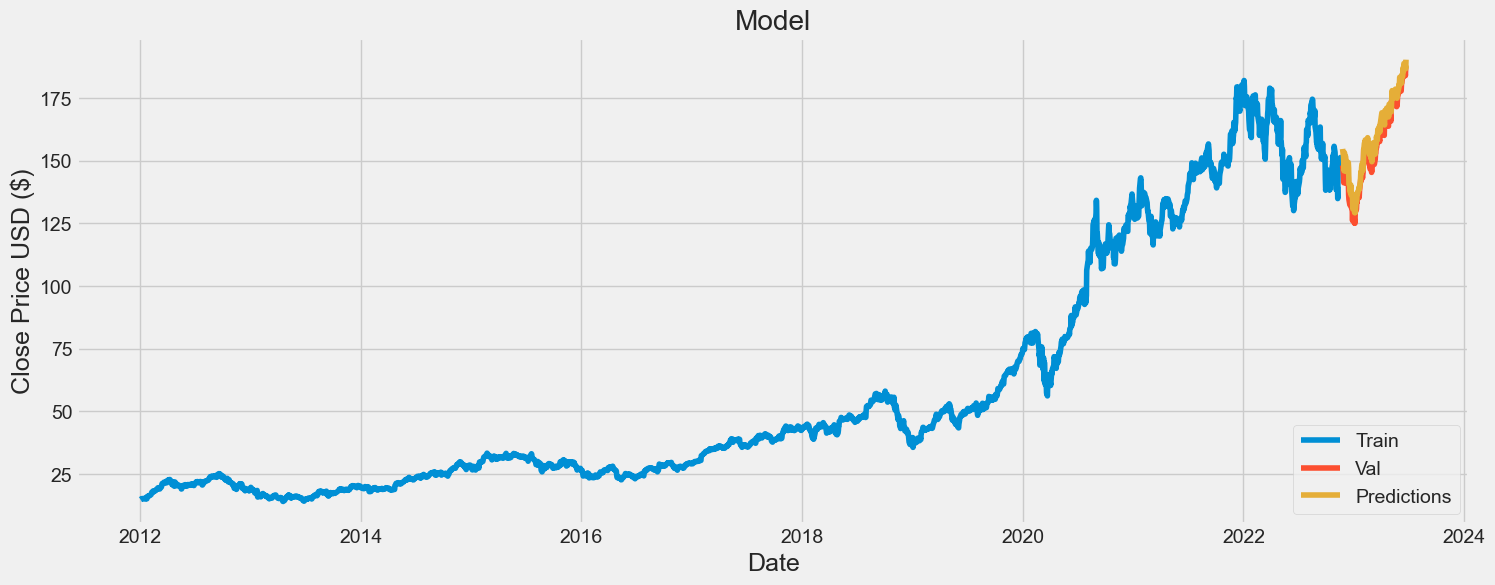

In [199]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [200]:
import joblib
joblib.dump(model_appl,'model_appl.pkl')

['model_appl.pkl']